In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
file_path = "/Users/yuanhang/Desktop/UCLA/2024 spring/441 lab /w3/Archive/AAPL_quarterly_financials.csv"
y = pd.read_csv(file_path)

In [104]:
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [105]:
y.index=y.name

In [106]:
y=pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:,:]

In [107]:
y.index=pd.to_datetime(y.index)

In [108]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD\
y= y. sort_index(). fillna(0.)

# 1.) Import data.  Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.
Train, Test, Holdout (80%,15%,5%)

In [109]:
pip install pytrends


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [274]:
from pytrends.request import TrendReq
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession", "Samsung", "Interest Rates", "New Phone", "Buy iPhone",'BJJ','DOJOCAT','HIIT']  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [275]:
X=df.resample('Q').mean()
temp = pd.concat([y,X],axis=1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [276]:
df

,iPhone,Recession,Samsung,Interest Rates,New Phone,Buy iPhone,BJJ,DOJOCAT,HIIT
date,,,,,,,,,
2004-01-01,0,8,27,58,48,0,20,0,3
2004-02-01,0,7,22,57,45,0,22,0,2
2004-03-01,0,7,23,66,43,0,18,0,4
2004-04-01,0,9,23,72,48,0,20,0,3
2004-05-01,0,8,23,65,47,0,23,0,3
...,...,...,...,...,...,...,...,...,...
2023-09-01,69,22,59,72,85,47,100,20,34
2023-10-01,57,22,59,67,79,37,91,7,33
2023-11-01,52,21,62,75,75,36,89,6,32


# 2.) Normalize all the X data

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
scaler=StandardScaler()

In [279]:
X_scaler=scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [285]:
from sklearn.linear_model import Lasso

In [286]:
Lasso=Lasso(alpha=.03)

In [287]:
Lasso.fit(X_scaler,y)

Lasso(alpha=0.03)

In [288]:
coefficients = Lasso.coef_
print(coefficients)

[ 0.05558482 -0.01042482  0.          0.07773963  0.27892891  0.
  0.07064209  0.01778479  0.        ]


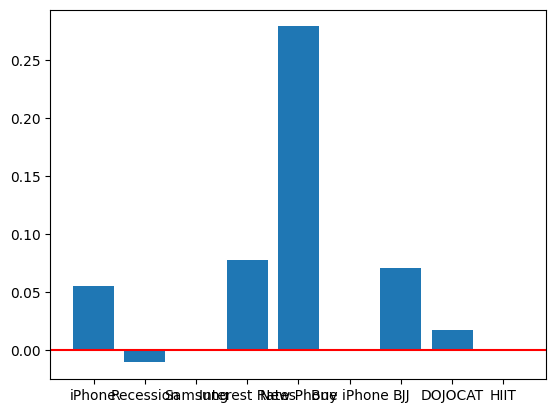

In [289]:
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0,color='red')
plt.show()


# 5.) Do these coefficient magnitudes make sense?

I changed the alpha to 0.03 because when alpha is 0.5, the penalty is too large and make all the coefficient equal to 0.
The coefficient magnitudes are not very make sense. Since the keywords buy iphone and Samsung have been set to coefficient=o while the BJJ and DOJOCAT have positive influnce.